<p style="color:goldenrod;line-height:120px;font-size:20px;line-height:30px;">Important dates in the 2008-2009 financial crisis and their impact on the MOEX index</p>

In [14]:
%matplotlib notebook

Matplotlib is building the font cache; this may take a moment.


In [15]:
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('IMOEX.txt')

In [3]:
df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,IMOEX [INDX],Daily,20061213,0,1608.0,1610.0,1569.0,1599.0,6.345148e+10
1,IMOEX [INDX],Daily,20061214,0,1599.0,1615.0,1599.0,1614.0,4.041306e+10
2,IMOEX [INDX],Daily,20061215,0,1614.0,1630.0,1614.0,1627.0,4.729606e+10
3,IMOEX [INDX],Daily,20061218,0,1627.0,1633.0,1622.0,1631.0,3.483348e+10
4,IMOEX [INDX],Daily,20061219,0,1631.0,1631.0,1582.0,1604.0,4.832818e+10


In [4]:
df.columns = ['ticker', 'period', 'date', 'time', 'open', 'high', 'low', 'close', 'vol']

In [5]:
df.head()

,ticker,period,date,time,open,high,low,close,vol
0,IMOEX [INDX],Daily,20061213,0,1608.0,1610.0,1569.0,1599.0,6.345148e+10
1,IMOEX [INDX],Daily,20061214,0,1599.0,1615.0,1599.0,1614.0,4.041306e+10
2,IMOEX [INDX],Daily,20061215,0,1614.0,1630.0,1614.0,1627.0,4.729606e+10
3,IMOEX [INDX],Daily,20061218,0,1627.0,1633.0,1622.0,1631.0,3.483348e+10
4,IMOEX [INDX],Daily,20061219,0,1631.0,1631.0,1582.0,1604.0,4.832818e+10


In [6]:
df['date'] = df['date'].apply(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3688 entries, 0 to 3687
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  3688 non-null   object 
 1   period  3688 non-null   object 
 2   date    3688 non-null   object 
 3   time    3688 non-null   int64  
 4   open    3688 non-null   float64
 5   high    3688 non-null   float64
 6   low     3688 non-null   float64
 7   close   3688 non-null   float64
 8   vol     3688 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 259.4+ KB


In [10]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3688 entries, 0 to 3687
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ticker  3688 non-null   object        
 1   period  3688 non-null   object        
 2   date    3688 non-null   datetime64[ns]
 3   time    3688 non-null   int64         
 4   open    3688 non-null   float64       
 5   high    3688 non-null   float64       
 6   low     3688 non-null   float64       
 7   close   3688 non-null   float64       
 8   vol     3688 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 259.4+ KB


<IPython.core.display.Javascript object>


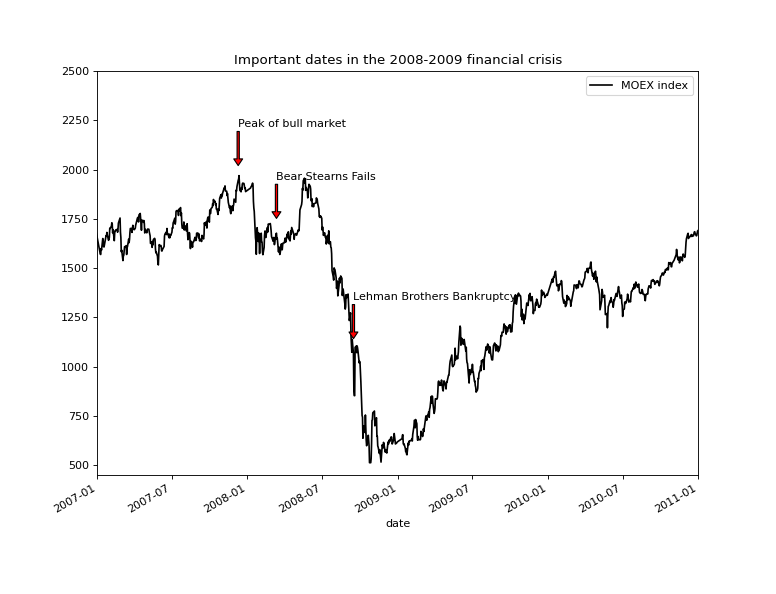

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [17]:
df.plot(ax=ax, x='date', y='close', style='k-', label='MOEX index')

<AxesSubplot:xlabel='date'>

In [18]:
import datetime as dt

In [19]:
crisis_periods = [
    (dt.datetime(2007, 12, 10), 'Peak of bull market'),
    (dt.datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (dt.datetime(2008, 9, 15), 'Lehman Brothers Bankruptcy')
]

In [20]:
for date, label in crisis_periods:
    ax.annotate(label, xy=(date, df.loc[df.date==date, 'close'] + 75),
                xytext=(date, df.loc[df.date==date, 'close'] + 310),
                arrowprops=dict(facecolor='red', headwidth=8, width=2, headlength=6),
                horizontalalignment='left', verticalalignment='top')

In [22]:
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([450, 2500])

(450.0, 2500.0)

In [23]:
ax.set_title('Important dates in the 2008-2009 financial crisis')

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')